## Convolutional Neural Network

In [29]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

### preprocessing of training set

In [30]:
#Image augmentation -> to avoid overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255, #feature scaling for each and every pixel
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64,64), #resize images for computational effieciency
    batch_size = 32,
    class_mode = 'binary') #we have a binary outcome cat/dog

Found 8000 images belonging to 2 classes.


### preprocessing of test set

In [31]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size= 32,
    class_mode= 'binary')

Found 2000 images belonging to 2 classes.


### Building the CNN

In [32]:
#initialize CNN
cnn = tf.keras.models.Sequential()

In [33]:
#Adding convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape=[64,64,3])) 

# we need to add feature detectors here with the help of filters parameter
# we have a colored images hence input shape will be (64,64,3)


#output of this step will be a Feature map -> we need to apply Max pooling to this -> to get pooled feature map

In [34]:
#pooling (Max pooling layer)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#pool_size: Frame
#strides = by which number of pixel poolsized frame shifted to the right


In [35]:
#adding second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [36]:
# Flattening
#flattening reults of all the above convolutions into a one dimensional vector which will become the input of future fully connected network
cnn.add(tf.keras.layers.Flatten())

In [37]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [38]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the CNN

In [39]:
#compile the cnn
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [40]:
#traiinig the CNN pn train set
cnn.fit(x=training_set, validation_data = test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 160s 634ms/step - loss: 0.7268 - accuracy: 0.5204 - val_loss: 0.6467 - val_accuracy: 0.6430
Epoch 2/25
250/250 [==============================] - 53s 213ms/step - loss: 0.6099 - accuracy: 0.6663 - val_loss: 0.5809 - val_accuracy: 0.6890
Epoch 3/25
250/250 [==============================] - 52s 210ms/step - loss: 0.5805 - accuracy: 0.6992 - val_loss: 0.5313 - val_accuracy: 0.7375
Epoch 4/25
250/250 [==============================] - 56s 222ms/step - loss: 0.5428 - accuracy: 0.7194 - val_loss: 0.5225 - val_accuracy: 0.7500
Epoch 5/25
250/250 [==============================] - 54s 216ms/step - loss: 0.5097 - accuracy: 0.7454 - val_loss: 0.5081 - val_accuracy: 0.7515
Epoch 6/25
250/250 [==============================] - 54s 214ms/step - loss: 0.5110 - accuracy: 0.7475 - val_loss: 0.5042 - val_accuracy: 0.7620
Epoch 7/25
250/250 [==============================] - 53s 214ms/step - loss: 0.5001 - accuracy: 0.7582 - val_loss: 0.4966 - val_a

#### Making a prediction

In [53]:
import numpy as np
from keras_preprocessing import image

def preprocess_image(pic):
    #test_image=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size = (64,64))
    test_image=image.load_img(pic,target_size = (64,64))
    test_image = image.img_to_array(test_image)#predict method expects its input as 2d array
    # we trained our model in batches, so, we need to add an extra dimension for this batch
    test_image = np.expand_dims(test_image, axis=0) #adding a fake 1st dimension 

    result = cnn.predict(test_image/255.0) #normalizing the image
    training_set.class_indices
    if result[0][0] >0.5:  #1st dimension is of batch
        prediction ='dog'
    else:
        prediction = 'cat'
    
    print(prediction)



dog


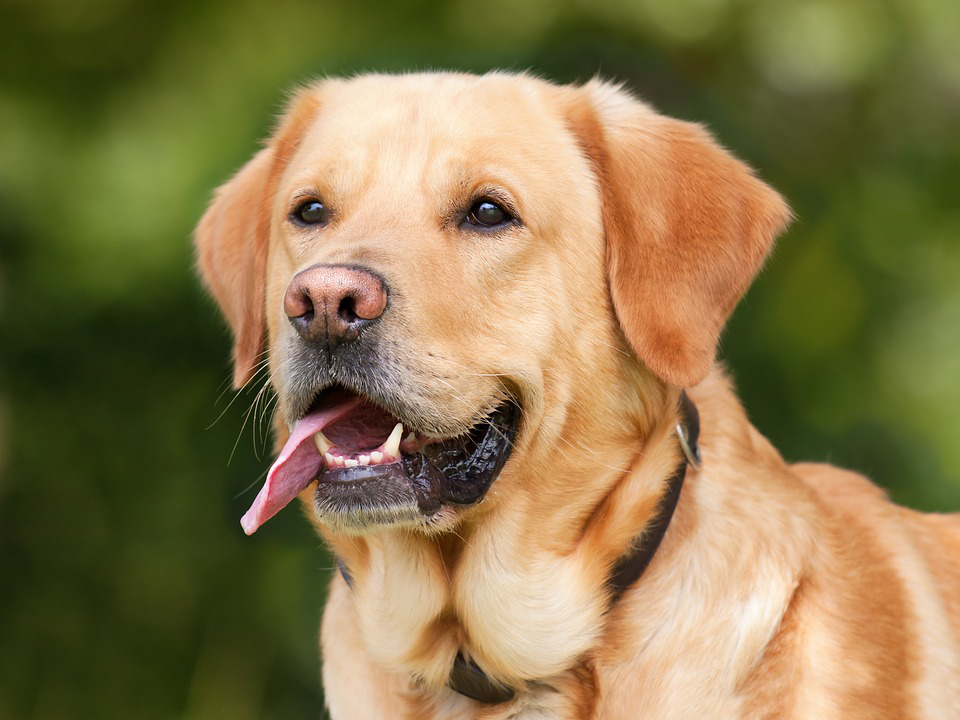

In [56]:
preprocess_image('dataset/single_prediction/cat_or_dog_1.jpg')
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg')

cat


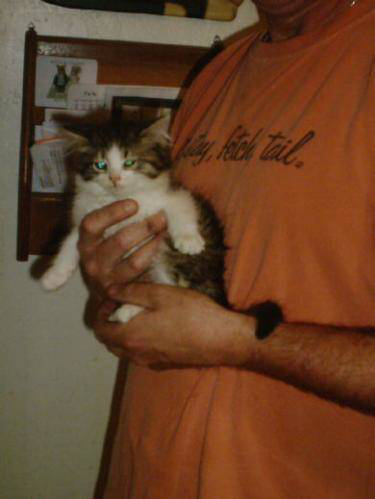

In [59]:
preprocess_image('dataset/test_set/cats/cat.4002.jpg')
image.load_img('dataset/test_set/cats/cat.4002.jpg')

cat


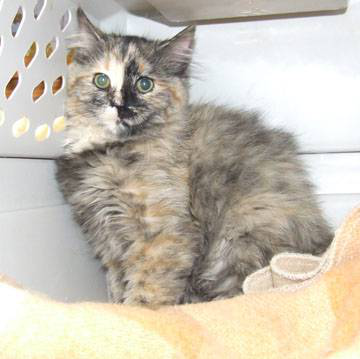

In [60]:
preprocess_image('dataset/test_set/cats/cat.4005.jpg')
image.load_img('dataset/test_set/cats/cat.4005.jpg')

dog


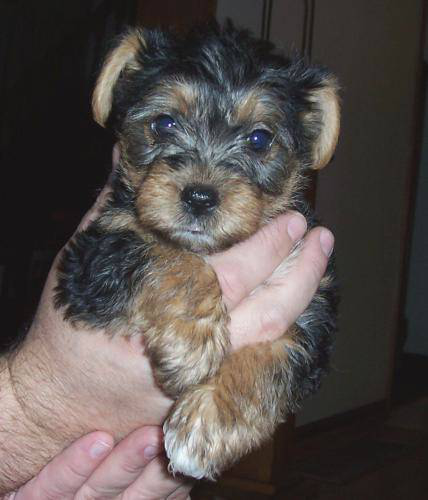

In [61]:
preprocess_image('dataset/test_set/dogs/dog.4002.jpg')
image.load_img('dataset/test_set/dogs/dog.4002.jpg')

dog


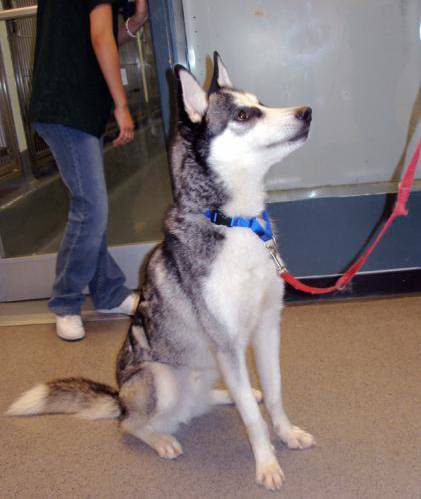

In [62]:
preprocess_image('dataset/test_set/dogs/dog.4001.jpg')
image.load_img('dataset/test_set/dogs/dog.4001.jpg')

dog


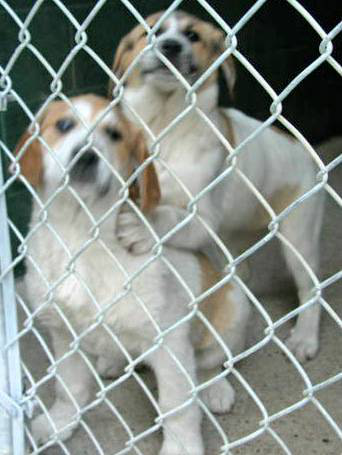

In [63]:
preprocess_image('dataset/test_set/dogs/dog.4008.jpg')
image.load_img('dataset/test_set/dogs/dog.4008.jpg')